In [3]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import scipy.integrate as integrate
import scipy.optimize

In [5]:
# define Gaussian function

def Gaussian(x, mu, sigma):
    # mu: the mean value of the distribution
    # sigma: the standard deviation of the distri.
    return 1/np.sqrt(2*np.pi*sigma*sigma)*np.exp(- (x-mu)*(x-mu)/(2*sigma*sigma) )


# define Poisson function

def Poisson(x, mu):
    # mu: the mean value of the distribution
    return np.exp(-mu)*(mu**x)/scipy.special.factorial(x)


# define Binomial function

def Binomial(x, N):
    return scipy.special.factorial(N)/scipy.special.factorial(x)/scipy.special.factorial(N-x)/2**N

## Exercise 1.1: Plot Gaussian, Poisson, binomial distribution based on some given PMFs

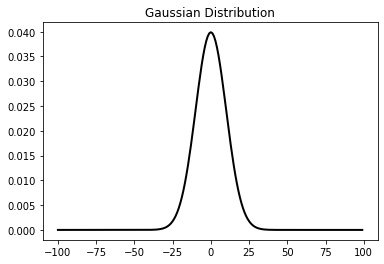

In [76]:
### Plot a Gaussian distri. ###

mu1 = 0.
sigma1 = 10.
x1 = np.arange(-100, 100, 1)
y1 = Gaussian(x1, mu1, sigma1)
plt.plot(x1, y1, color='black',linewidth=2)
plt.title('Gaussian Distribution')
plt.show()

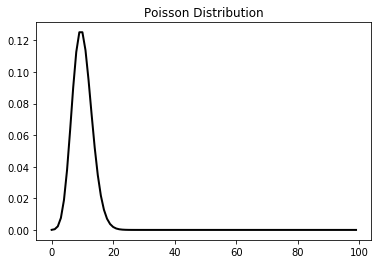

In [112]:
### Plot a Poisson distri. ###

mu2 = 10.
x2 = np.arange(0, 100, 1)
y2 = Poisson(x2, mu2)
plt.plot(x2, y2, color='black',linewidth=2)
plt.title('Poisson Distribution')
plt.show()

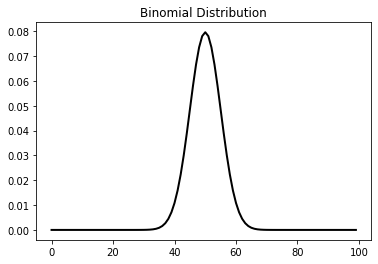

In [78]:
### Plot a Binomial distri. ###

N3 = 100.
x3 = np.arange(0, 100, 1)
y3 = Binomial(x3, N3)
plt.plot(x3, y3, color='black',linewidth=2)
plt.title('Binomial Distribution')
plt.show()

## Exercise 2: Plot the PMFs as binned histograms instead of continuous distributions

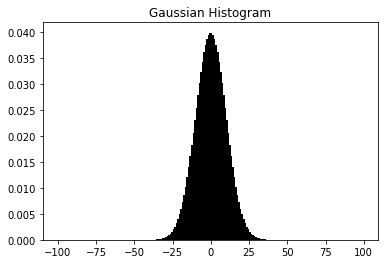

In [79]:
### Plot a Gaussian histogram ###

mu1, sigma1 = 0., 10.
binning = 1
bin1 = np.arange(-100, 100, binning)

data1 = []
for b in bin1:
    data1.append( integrate.quad(lambda x1: Gaussian(x1, mu1, sigma1), b, b+binning)[0]/binning )


plt.hist(bin1, weights=data1, bins=bin1, color='black')
plt.title('Gaussian Histogram')
plt.show()

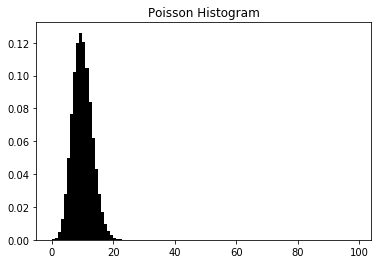

In [113]:
### Plot a Poisson histogram ###

mu2 = 10.
binning = 1
bin2 = np.arange(0, 100, binning)

data2 = []
for b in bin2:
    data2.append( integrate.quad(lambda x2: Poisson(x2, mu2), b, b+binning)[0]/binning )


plt.hist(bin2, weights=data2, bins=bin2, color='black')
plt.title('Poisson Histogram')
plt.show()

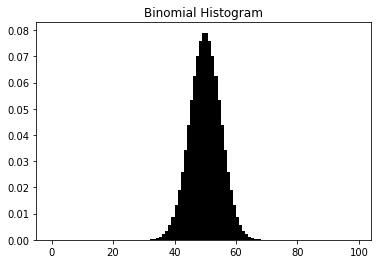

In [81]:
### Plot a Binomial histogram ###

N3 = 100
binning = 1
bin3 = np.arange(0, 100, binning)

data3 = []
for b in bin3:
    data3.append( integrate.quad(lambda x3: Binomial(x3, N3), b, b+binning)[0]/binning )


plt.hist(bin3, weights=data3, bins=bin3, color='black')
plt.title('Binomial Histogram')
plt.show()

## Exercise 3: Randomly sample the PMFs

Optimization terminated successfully.
         Current function value: -0.039894
         Iterations: 24
         Function evaluations: 48


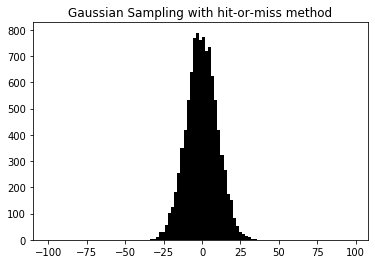

In [10]:
### Sample the Gaussian distribution ###
### (using hit-or-miss method)

N_trial = 10000
scaleX = [-100, 100]
mu1, sigma1 = 0., 10.

##Find the maximum of this Gaussian function
idx_max = scipy.optimize.fmin(lambda x: -Gaussian(x, mu1, sigma1), -100)[0]
Gaus_scale = Gaussian(idx_max, mu1, sigma1)

#hit or miss
sample1 = []
while len(sample1)<10000:
    
    #generate a 2D random data
    rnX = np.random.uniform(scaleX[0], scaleX[1])
    rnY = np.random.uniform()*Gaus_scale
    
    if rnY < Gaussian(rnX, mu1, sigma1):
        sample1.append(rnX)
        

#plot the histogram
bin1 = np.arange(-100, 100, 2)

plt.hist(sample1, bin1, color='black')
plt.title('Gaussian Sampling with hit-or-miss method')
plt.show()

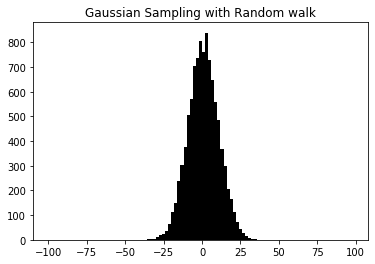

In [189]:
### Sample the Gaussian distribution ###
### (using Random walk case)

"""
Description :

Assume a man walks in a 1D path.
For each step, He randomly moves a distance -1 or 1 unit
Calculate the total displacement he moves in the end of N steps

"""

N_trial = 10000
N_step = 100
prob = 0.5

#generate displacement for each step, and sum up to be total displacement
Distance_tot = []
for trial in range(0,N_trial):
    dis_tot = 0
    for step in range(0,N_step):
        is_positive = np.random.uniform(0, 1)
        if  is_positive > prob:
            dis_tot += 1
        else:
            dis_tot += (-1)
    Distance_tot.append(dis_tot)



#plot the histogram
bin1 = np.arange(-100, 100, 2)

plt.hist(Distance_tot, bin1, color='black')
plt.title('Gaussian Sampling with Random walk')
plt.show()

Optimization terminated successfully.
         Current function value: -0.126683
         Iterations: 31
         Function evaluations: 62


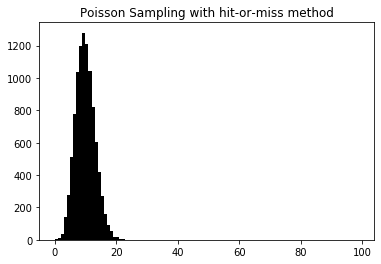

In [11]:
### Sample the Poisson distribution ###
### (using hit-or-miss method)

N_trial = 10000
scaleX = [0, 100]
mu2 = 10.

##Find the maximum of this Gaussian function
idx_max = scipy.optimize.fmin(lambda x: -Poisson(x, mu2), 0)[0]
Poi_scale = Poisson(idx_max, mu2)

#hit or miss
sample2 = []
while len(sample2)<10000:
    
    #generate a 2D random data
    rnX2 = np.random.uniform(scaleX[0], scaleX[1])
    rnY2 = np.random.uniform()*Poi_scale
    
    if rnY2 < Poisson(rnX2, mu2):
        sample2.append(rnX2)
        

#plot the histogram
bin2 = np.arange(0, 100, 1)

plt.hist(sample2, bin2, color='black')
plt.title('Poisson Sampling with hit-or-miss method')
plt.show()

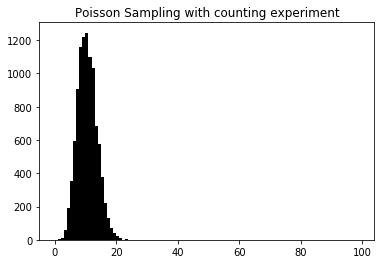

In [117]:
### Sample the Poisson distribution ###
### (using counting experiment case)

"""
Description :

Assume a researcher conducts an experiment counting the number of particles recieved by the sensor 
in a cerntain time interval T.

And suppose the probability p to detect a particle in a small time interval delta_t is rare.

Repeat this experiment N_trial times and plot the histogram of the number of particles recieved.

"""

N_trial = 10000
T = 1000 # T = 10000 delta_t (n = T/delta_t is suggested to be large for Poisson model)
p = 0.01

#generate number of particles received in each experiment
Nparticle = []
for trial in range(0,N_trial):
    nrecieved = 0
    for time in range(0,T):
        if np.random.uniform(0, 1) < p:
            nrecieved += 1
    Nparticle.append(nrecieved)
        

#plot the histogram
bin2 = np.arange(0, 100, 1)

plt.hist(Nparticle, bin2, color='black')
plt.title('Poisson Sampling with counting experiment')
plt.show()

Optimization terminated successfully.
         Current function value: -0.079589
         Iterations: 36
         Function evaluations: 72


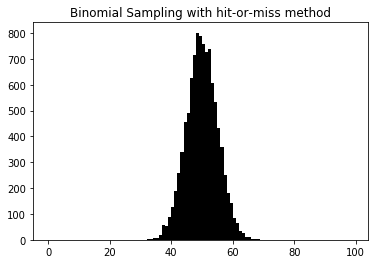

In [12]:
### Sample the Binomial distribution ###
### (using hit-or-miss method)

N_trial = 10000
scaleX = [0, 100]
N3 = 100

##Find the maximum of this Gaussian function
idx_max = scipy.optimize.fmin(lambda x: -Binomial(x, N3), 0)[0]
Bino_scale = Binomial(idx_max, N3) 

#hit or miss
sample3 = []
while len(sample3)<10000:
    
    #generate a 2D random data
    rnX3 = np.random.uniform(scaleX[0], scaleX[1])
    rnY3 = np.random.uniform()*Bino_scale
    
    if rnY3 < Binomial(rnX3, N3):
        sample3.append(rnX3)
        

#plot the histogram
bin3 = np.arange(0, 100, 1)

plt.hist(sample3, bin3, color='black')
plt.title('Binomial Sampling with hit-or-miss method')
plt.show()

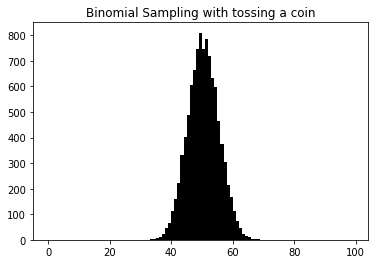

In [118]:
### Sample the Binomial distribution ###
### (using toss a coin case)

"""
Description :

Assume that when tossing a coin, the probability to get the head side is 0.5.
If one toss the coin N_times, plot the histogram of the times of getting the head side.

"""
N_times = 100
N_trial = 10000
p_head = 0.5

#generate number of head obtained in each trial
Nhead = []
for trial in range(0,N_trial):
    head = 0
    for r in range(0,N_times):
        if np.random.uniform(0, 1) > p_head:
            head += 1
    Nhead.append(head)
        

#plot the histogram
bin3 = np.arange(0, 100, 1)

plt.hist(Nhead, bin3, color='black')
plt.title('Binomial Sampling with tossing a coin')
plt.show()